# WeatherPy
----

### Analysis

#### Had to clean data to remove null and blank values otherwise erors occured 
#### City latitude and cloudiness have no correlation
#### City latitude and wind have no correlation
#### Maximum temperature is higher in southern hem versus norther due to tilt of earth
#### Hummidity is higher in southern hemasphere and to lower northern hemasphere due to position of earth



In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv
import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

605

In [25]:
#Create a data frame that will store the cities and then the retrived data from the call
cities_df = pd.DataFrame(cities)
cities_df = cities_df.rename(columns={0 : "City"})
cities_df["Cloudiness"] = ""
cities_df["Country"] = ""
cities_df["Date"] = ""
cities_df["Humidity"] = ""
cities_df["Lat"] = ""
cities_df["Lng"] = ""
cities_df["Max Temp"] = ""
#cities_df["Temp"] = ""
cities_df["Wind Speed"] = ""
cities_df["Description"] = ""
cities_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed,Description
0,mataura,,,,,,,,,
1,morogoro,,,,,,,,,
2,new norfolk,,,,,,,,,
3,luang prabang,,,,,,,,,
4,serebryansk,,,,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [26]:
#base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
#default units
units = "imperial"
#start counter for totaling
counter = 1
total_records = len(cities_df)
city_not_found_counter = 0

#loop through data, add json data to DF
for index, row in cities_df.iterrows():
    city = row["City"]
    query_url = f"{url}appid={api_key}&units={units}&q={city}"
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    #handle error if city is not found
    if weather_json["cod"] == "404":
        print("Processing record " + str(counter) + " of " + str(total_records) + ". CITY '" + row["City"].upper() + "' NOT FOUND, moving on to next record.")
        print("-----------------------------------------------------------------------")
        counter += 1
        city_not_found_counter += 1
    else:
        print("Processing record " + str(counter) + " of " + str(total_records) + ".  City name: " + row["City"])
        print("URL: " + query_url)
        print("-----------------------------------------------------------------------")
        #cities_df.set_value(index, "City", weather_json["name"])
        cities_df.loc[index, "Cloudiness"]  = weather_json["clouds"]["all"]
        cities_df.loc[index, "Country"]     = weather_json["sys"]["country"]
        cities_df.loc[index, "Date"]        = weather_json["dt"]
        cities_df.loc[index, "Humidity"]    = weather_json["main"]["humidity"]
        cities_df.loc[index, "Lat"]         = weather_json["coord"]["lat"]
        cities_df.loc[index, "Lng"]         = weather_json["coord"]["lon"]
        cities_df.loc[index, "Max Temp"]    = weather_json["main"]["temp_max"]
        cities_df.loc[index, "Wind Speed"]  = weather_json["wind"]["speed"]
        cities_df.loc[index, "Description"]  = weather_json['weather'][0]['main']
        counter += 1
#end of report detail
print("\nCount, cities not found: " + str(city_not_found_counter))
print("\n*** END OF PROCESSING ***")
 

Processing record 1 of 615.  City name: mataura
URL: http://api.openweathermap.org/data/2.5/weather?appid=3e3b13dbe170dfd664b85e1a0a8259da&units=imperial&q=mataura
-----------------------------------------------------------------------
Processing record 2 of 615.  City name: morogoro
URL: http://api.openweathermap.org/data/2.5/weather?appid=3e3b13dbe170dfd664b85e1a0a8259da&units=imperial&q=morogoro
-----------------------------------------------------------------------
Processing record 3 of 615.  City name: new norfolk
URL: http://api.openweathermap.org/data/2.5/weather?appid=3e3b13dbe170dfd664b85e1a0a8259da&units=imperial&q=new norfolk
-----------------------------------------------------------------------
Processing record 4 of 615.  City name: luang prabang
URL: http://api.openweathermap.org/data/2.5/weather?appid=3e3b13dbe170dfd664b85e1a0a8259da&units=imperial&q=luang prabang
-----------------------------------------------------------------------
Processing record 5 of 615.  City 

Processing record 39 of 615.  City name: iqaluit
URL: http://api.openweathermap.org/data/2.5/weather?appid=3e3b13dbe170dfd664b85e1a0a8259da&units=imperial&q=iqaluit
-----------------------------------------------------------------------
Processing record 40 of 615.  City name: arraial do cabo
URL: http://api.openweathermap.org/data/2.5/weather?appid=3e3b13dbe170dfd664b85e1a0a8259da&units=imperial&q=arraial do cabo
-----------------------------------------------------------------------
Processing record 41 of 615.  City name: mackay
URL: http://api.openweathermap.org/data/2.5/weather?appid=3e3b13dbe170dfd664b85e1a0a8259da&units=imperial&q=mackay
-----------------------------------------------------------------------
Processing record 42 of 615.  City name: elmina
URL: http://api.openweathermap.org/data/2.5/weather?appid=3e3b13dbe170dfd664b85e1a0a8259da&units=imperial&q=elmina
-----------------------------------------------------------------------
Processing record 43 of 615.  City name:

Processing record 75 of 615.  City name: san patricio
URL: http://api.openweathermap.org/data/2.5/weather?appid=3e3b13dbe170dfd664b85e1a0a8259da&units=imperial&q=san patricio
-----------------------------------------------------------------------
Processing record 76 of 615.  City name: berlevag
URL: http://api.openweathermap.org/data/2.5/weather?appid=3e3b13dbe170dfd664b85e1a0a8259da&units=imperial&q=berlevag
-----------------------------------------------------------------------
Processing record 77 of 615.  City name: victoria
URL: http://api.openweathermap.org/data/2.5/weather?appid=3e3b13dbe170dfd664b85e1a0a8259da&units=imperial&q=victoria
-----------------------------------------------------------------------
Processing record 78 of 615. CITY 'TUMANNYY' NOT FOUND, moving on to next record.
-----------------------------------------------------------------------
Processing record 79 of 615.  City name: dashitou
URL: http://api.openweathermap.org/data/2.5/weather?appid=3e3b13dbe170d

Processing record 111 of 615.  City name: georgetown
URL: http://api.openweathermap.org/data/2.5/weather?appid=3e3b13dbe170dfd664b85e1a0a8259da&units=imperial&q=georgetown
-----------------------------------------------------------------------
Processing record 112 of 615.  City name: chandvad
URL: http://api.openweathermap.org/data/2.5/weather?appid=3e3b13dbe170dfd664b85e1a0a8259da&units=imperial&q=chandvad
-----------------------------------------------------------------------
Processing record 113 of 615.  City name: klaksvik
URL: http://api.openweathermap.org/data/2.5/weather?appid=3e3b13dbe170dfd664b85e1a0a8259da&units=imperial&q=klaksvik
-----------------------------------------------------------------------
Processing record 114 of 615.  City name: san cristobal
URL: http://api.openweathermap.org/data/2.5/weather?appid=3e3b13dbe170dfd664b85e1a0a8259da&units=imperial&q=san cristobal
-----------------------------------------------------------------------
Processing record 115 of 6

Processing record 148 of 615.  City name: carnarvon
URL: http://api.openweathermap.org/data/2.5/weather?appid=3e3b13dbe170dfd664b85e1a0a8259da&units=imperial&q=carnarvon
-----------------------------------------------------------------------
Processing record 149 of 615.  City name: olutanga
URL: http://api.openweathermap.org/data/2.5/weather?appid=3e3b13dbe170dfd664b85e1a0a8259da&units=imperial&q=olutanga
-----------------------------------------------------------------------
Processing record 150 of 615.  City name: zhigansk
URL: http://api.openweathermap.org/data/2.5/weather?appid=3e3b13dbe170dfd664b85e1a0a8259da&units=imperial&q=zhigansk
-----------------------------------------------------------------------
Processing record 151 of 615.  City name: privolzhskiy
URL: http://api.openweathermap.org/data/2.5/weather?appid=3e3b13dbe170dfd664b85e1a0a8259da&units=imperial&q=privolzhskiy
-----------------------------------------------------------------------
Processing record 152 of 615. 

Processing record 219 of 615.  City name: taoudenni
URL: http://api.openweathermap.org/data/2.5/weather?appid=3e3b13dbe170dfd664b85e1a0a8259da&units=imperial&q=taoudenni
-----------------------------------------------------------------------
Processing record 220 of 615.  City name: naze
URL: http://api.openweathermap.org/data/2.5/weather?appid=3e3b13dbe170dfd664b85e1a0a8259da&units=imperial&q=naze
-----------------------------------------------------------------------
Processing record 221 of 615.  City name: iskenderun
URL: http://api.openweathermap.org/data/2.5/weather?appid=3e3b13dbe170dfd664b85e1a0a8259da&units=imperial&q=iskenderun
-----------------------------------------------------------------------
Processing record 222 of 615.  City name: makokou
URL: http://api.openweathermap.org/data/2.5/weather?appid=3e3b13dbe170dfd664b85e1a0a8259da&units=imperial&q=makokou
-----------------------------------------------------------------------
Processing record 223 of 615.  City name: ve

Processing record 256 of 615.  City name: byron bay
URL: http://api.openweathermap.org/data/2.5/weather?appid=3e3b13dbe170dfd664b85e1a0a8259da&units=imperial&q=byron bay
-----------------------------------------------------------------------
Processing record 257 of 615.  City name: celestun
URL: http://api.openweathermap.org/data/2.5/weather?appid=3e3b13dbe170dfd664b85e1a0a8259da&units=imperial&q=celestun
-----------------------------------------------------------------------
Processing record 258 of 615.  City name: pangkalanbuun
URL: http://api.openweathermap.org/data/2.5/weather?appid=3e3b13dbe170dfd664b85e1a0a8259da&units=imperial&q=pangkalanbuun
-----------------------------------------------------------------------
Processing record 259 of 615.  City name: ajdabiya
URL: http://api.openweathermap.org/data/2.5/weather?appid=3e3b13dbe170dfd664b85e1a0a8259da&units=imperial&q=ajdabiya
-----------------------------------------------------------------------
Processing record 260 of 615

Processing record 293 of 615.  City name: oeiras do para
URL: http://api.openweathermap.org/data/2.5/weather?appid=3e3b13dbe170dfd664b85e1a0a8259da&units=imperial&q=oeiras do para
-----------------------------------------------------------------------
Processing record 294 of 615.  City name: lavrentiya
URL: http://api.openweathermap.org/data/2.5/weather?appid=3e3b13dbe170dfd664b85e1a0a8259da&units=imperial&q=lavrentiya
-----------------------------------------------------------------------
Processing record 295 of 615.  City name: pisz
URL: http://api.openweathermap.org/data/2.5/weather?appid=3e3b13dbe170dfd664b85e1a0a8259da&units=imperial&q=pisz
-----------------------------------------------------------------------
Processing record 296 of 615. CITY 'VAITUPU' NOT FOUND, moving on to next record.
-----------------------------------------------------------------------
Processing record 297 of 615.  City name: mikhaylovka
URL: http://api.openweathermap.org/data/2.5/weather?appid=3e3b13

Processing record 329 of 615.  City name: alta floresta
URL: http://api.openweathermap.org/data/2.5/weather?appid=3e3b13dbe170dfd664b85e1a0a8259da&units=imperial&q=alta floresta
-----------------------------------------------------------------------
Processing record 330 of 615.  City name: jacareacanga
URL: http://api.openweathermap.org/data/2.5/weather?appid=3e3b13dbe170dfd664b85e1a0a8259da&units=imperial&q=jacareacanga
-----------------------------------------------------------------------
Processing record 331 of 615.  City name: coihaique
URL: http://api.openweathermap.org/data/2.5/weather?appid=3e3b13dbe170dfd664b85e1a0a8259da&units=imperial&q=coihaique
-----------------------------------------------------------------------
Processing record 332 of 615.  City name: sorland
URL: http://api.openweathermap.org/data/2.5/weather?appid=3e3b13dbe170dfd664b85e1a0a8259da&units=imperial&q=sorland
-----------------------------------------------------------------------
Processing record 333 

Processing record 367 of 615.  City name: kenai
URL: http://api.openweathermap.org/data/2.5/weather?appid=3e3b13dbe170dfd664b85e1a0a8259da&units=imperial&q=kenai
-----------------------------------------------------------------------
Processing record 368 of 615.  City name: sangar
URL: http://api.openweathermap.org/data/2.5/weather?appid=3e3b13dbe170dfd664b85e1a0a8259da&units=imperial&q=sangar
-----------------------------------------------------------------------
Processing record 369 of 615.  City name: port pirie
URL: http://api.openweathermap.org/data/2.5/weather?appid=3e3b13dbe170dfd664b85e1a0a8259da&units=imperial&q=port pirie
-----------------------------------------------------------------------
Processing record 370 of 615. CITY 'SALEAULA' NOT FOUND, moving on to next record.
-----------------------------------------------------------------------
Processing record 371 of 615. CITY 'VILIGILI' NOT FOUND, moving on to next record.
------------------------------------------------

Processing record 404 of 615.  City name: ostrovnoy
URL: http://api.openweathermap.org/data/2.5/weather?appid=3e3b13dbe170dfd664b85e1a0a8259da&units=imperial&q=ostrovnoy
-----------------------------------------------------------------------
Processing record 405 of 615.  City name: qaqortoq
URL: http://api.openweathermap.org/data/2.5/weather?appid=3e3b13dbe170dfd664b85e1a0a8259da&units=imperial&q=qaqortoq
-----------------------------------------------------------------------
Processing record 406 of 615.  City name: charcas
URL: http://api.openweathermap.org/data/2.5/weather?appid=3e3b13dbe170dfd664b85e1a0a8259da&units=imperial&q=charcas
-----------------------------------------------------------------------
Processing record 407 of 615.  City name: mao
URL: http://api.openweathermap.org/data/2.5/weather?appid=3e3b13dbe170dfd664b85e1a0a8259da&units=imperial&q=mao
-----------------------------------------------------------------------
Processing record 408 of 615.  City name: viedma
U

Processing record 440 of 615.  City name: koumac
URL: http://api.openweathermap.org/data/2.5/weather?appid=3e3b13dbe170dfd664b85e1a0a8259da&units=imperial&q=koumac
-----------------------------------------------------------------------
Processing record 441 of 615.  City name: guatire
URL: http://api.openweathermap.org/data/2.5/weather?appid=3e3b13dbe170dfd664b85e1a0a8259da&units=imperial&q=guatire
-----------------------------------------------------------------------
Processing record 442 of 615. CITY 'KYRA' NOT FOUND, moving on to next record.
-----------------------------------------------------------------------
Processing record 443 of 615.  City name: anito
URL: http://api.openweathermap.org/data/2.5/weather?appid=3e3b13dbe170dfd664b85e1a0a8259da&units=imperial&q=anito
-----------------------------------------------------------------------
Processing record 444 of 615.  City name: gayny
URL: http://api.openweathermap.org/data/2.5/weather?appid=3e3b13dbe170dfd664b85e1a0a8259da&un

Processing record 478 of 615.  City name: general roca
URL: http://api.openweathermap.org/data/2.5/weather?appid=3e3b13dbe170dfd664b85e1a0a8259da&units=imperial&q=general roca
-----------------------------------------------------------------------
Processing record 479 of 615.  City name: balaipungut
URL: http://api.openweathermap.org/data/2.5/weather?appid=3e3b13dbe170dfd664b85e1a0a8259da&units=imperial&q=balaipungut
-----------------------------------------------------------------------
Processing record 480 of 615.  City name: ongole
URL: http://api.openweathermap.org/data/2.5/weather?appid=3e3b13dbe170dfd664b85e1a0a8259da&units=imperial&q=ongole
-----------------------------------------------------------------------
Processing record 481 of 615.  City name: odesskoye
URL: http://api.openweathermap.org/data/2.5/weather?appid=3e3b13dbe170dfd664b85e1a0a8259da&units=imperial&q=odesskoye
-----------------------------------------------------------------------
Processing record 482 of 615

Processing record 514 of 615.  City name: porto belo
URL: http://api.openweathermap.org/data/2.5/weather?appid=3e3b13dbe170dfd664b85e1a0a8259da&units=imperial&q=porto belo
-----------------------------------------------------------------------
Processing record 515 of 615.  City name: umm lajj
URL: http://api.openweathermap.org/data/2.5/weather?appid=3e3b13dbe170dfd664b85e1a0a8259da&units=imperial&q=umm lajj
-----------------------------------------------------------------------
Processing record 516 of 615.  City name: urucara
URL: http://api.openweathermap.org/data/2.5/weather?appid=3e3b13dbe170dfd664b85e1a0a8259da&units=imperial&q=urucara
-----------------------------------------------------------------------
Processing record 517 of 615.  City name: tigre
URL: http://api.openweathermap.org/data/2.5/weather?appid=3e3b13dbe170dfd664b85e1a0a8259da&units=imperial&q=tigre
-----------------------------------------------------------------------
Processing record 518 of 615.  City name: zd

Processing record 551 of 615.  City name: la ronge
URL: http://api.openweathermap.org/data/2.5/weather?appid=3e3b13dbe170dfd664b85e1a0a8259da&units=imperial&q=la ronge
-----------------------------------------------------------------------
Processing record 552 of 615.  City name: along
URL: http://api.openweathermap.org/data/2.5/weather?appid=3e3b13dbe170dfd664b85e1a0a8259da&units=imperial&q=along
-----------------------------------------------------------------------
Processing record 553 of 615.  City name: kargopol
URL: http://api.openweathermap.org/data/2.5/weather?appid=3e3b13dbe170dfd664b85e1a0a8259da&units=imperial&q=kargopol
-----------------------------------------------------------------------
Processing record 554 of 615.  City name: anadyr
URL: http://api.openweathermap.org/data/2.5/weather?appid=3e3b13dbe170dfd664b85e1a0a8259da&units=imperial&q=anadyr
-----------------------------------------------------------------------
Processing record 555 of 615. CITY 'UMZIMVUBU' NOT

Processing record 588 of 615.  City name: kandrian
URL: http://api.openweathermap.org/data/2.5/weather?appid=3e3b13dbe170dfd664b85e1a0a8259da&units=imperial&q=kandrian
-----------------------------------------------------------------------
Processing record 589 of 615.  City name: mantua
URL: http://api.openweathermap.org/data/2.5/weather?appid=3e3b13dbe170dfd664b85e1a0a8259da&units=imperial&q=mantua
-----------------------------------------------------------------------
Processing record 590 of 615.  City name: dongsheng
URL: http://api.openweathermap.org/data/2.5/weather?appid=3e3b13dbe170dfd664b85e1a0a8259da&units=imperial&q=dongsheng
-----------------------------------------------------------------------
Processing record 591 of 615.  City name: leh
URL: http://api.openweathermap.org/data/2.5/weather?appid=3e3b13dbe170dfd664b85e1a0a8259da&units=imperial&q=leh
-----------------------------------------------------------------------
Processing record 592 of 615.  City name: abilene
UR

In [27]:
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=3e3b13dbe170dfd664b85e1a0a8259da&units=imperial&q=balvi'

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [28]:
#check data for nulls
cities_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 10 columns):
City           615 non-null object
Cloudiness     615 non-null object
Country        615 non-null object
Date           615 non-null object
Humidity       615 non-null object
Lat            615 non-null object
Lng            615 non-null object
Max Temp       615 non-null object
Wind Speed     615 non-null object
Description    615 non-null object
dtypes: object(10)
memory usage: 48.1+ KB


In [29]:
#remove records with null values
cities_df_nonull_pre = cities_df.dropna(how='any')
cities_df_nonull = cities_df_nonull_pre[cities_df_nonull_pre['Country'] !=""]

cities_df_nonull .info() 


<class 'pandas.core.frame.DataFrame'>
Int64Index: 559 entries, 0 to 614
Data columns (total 10 columns):
City           559 non-null object
Cloudiness     559 non-null object
Country        559 non-null object
Date           559 non-null object
Humidity       559 non-null object
Lat            559 non-null object
Lng            559 non-null object
Max Temp       559 non-null object
Wind Speed     559 non-null object
Description    559 non-null object
dtypes: object(10)
memory usage: 48.0+ KB


In [30]:
#Final Clean Data Frame
cities_df_nonull.to_csv("weather_data.csv", encoding="utf-8", index=False)
cities_df_nonull.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed,Description
0,mataura,76,NZ,1553299559,56,-46.19,168.86,72.08,4.94,Clouds
1,morogoro,88,TZ,1553299924,89,-6.82,37.67,74.78,4.05,Rain
2,new norfolk,75,AU,1553299575,60,-42.78,147.06,69.01,10.29,Clouds
3,luang prabang,0,LA,1553299925,83,19.89,102.14,62.45,1.7,Clear
4,serebryansk,0,KZ,1553299925,64,49.68,83.3,13.31,2.04,Clear


In [31]:
#DO NOT USE

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

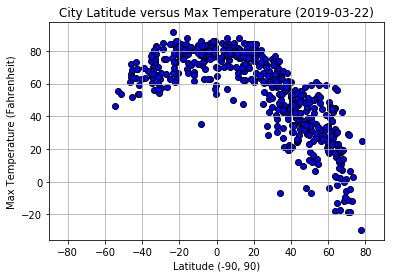

In [32]:
#City Latitude versus Max Temperature scatter plat
plt.scatter(cities_df_nonull["Lat"], cities_df_nonull["Max Temp"], marker="o", facecolors="blue", edgecolors="black")
plt.title("City Latitude versus Max Temperature (" + datetime.datetime.now().strftime('%Y-%m-%d') + ")")
plt.ylabel("Max Temperature (Fahrenheit)")
plt.xlabel("Latitude (-90, 90)")
plt.grid(True)
plt.xlim(-90,90)
plt.savefig("City_Latitude_vs_maxtemp_plot.png")
plt.show()

In [33]:
#DO NOT USE

#### Latitude vs. Humidity Plot

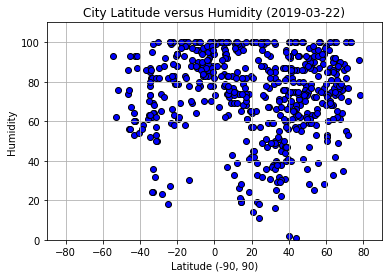

In [34]:
# City Latitude versus Humidity scatter plot
plt.scatter(cities_df_nonull["Lat"], cities_df_nonull["Humidity"], marker="o", facecolors="blue", edgecolors="black")
plt.title("City Latitude versus Humidity (" + datetime.datetime.now().strftime('%Y-%m-%d') + ")")
plt.xlabel("Latitude (-90, 90)")
plt.ylabel("Humidity")
plt.grid(True)
plt.savefig("City_Latitude_vs_humidity_plot.png")
plt.ylim(0,110)
plt.xlim(-90,90)
plt.show()

In [35]:
#DO NOT USE

#### Latitude vs. Cloudiness Plot

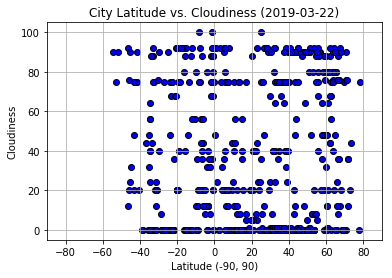

In [36]:
#City Latitude vs. Cloudiness scatter plot
plt.scatter(cities_df_nonull["Lat"], cities_df_nonull["Cloudiness"], marker="o", facecolors="blue", edgecolors="black")
plt.title("City Latitude vs. Cloudiness (" + datetime.datetime.now().strftime('%Y-%m-%d') + ")")
plt.xlabel("Latitude (-90, 90)")
plt.ylabel("Cloudiness")
plt.grid(True)
plt.xlim(-90,90)
plt.savefig("City_Latitude_vs_cloudiness_plot.png")
plt.show()

#### Latitude vs. Wind Speed Plot

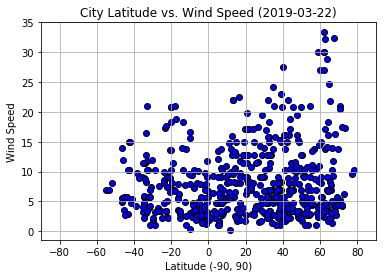

In [37]:
#City Latitude vs. Wind Speed scatter plot
plt.scatter(cities_df_nonull["Lat"], cities_df_nonull["Wind Speed"], marker="o", facecolors="blue", edgecolors="black")
plt.title("City Latitude vs. Wind Speed (" + datetime.datetime.now().strftime('%Y-%m-%d') + ")")
plt.xlabel("Latitude (-90, 90)")
plt.ylabel("Wind Speed")
plt.grid(True)
plt.xlim(-90,90)
plt.savefig("City_Latitude_vs_Wind_Speed_plot.png")
plt.show()

In [38]:
#DO NOT USE